In [ ]:
#import relevant libraries and function
from google.colab import files
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn import model_selection
import time
import matplotlib.pyplot as plt
np.random.seed(6)
import math

In [ ]:
#define relevent functions such as PCA

def PCA(X , num_of_components):
     
    #mean center the X matrix
    X_meaned = X - np.mean(X , axis = 0)
     
    #evaluate covarience matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #evaluate eigen values/vectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #sort eigen values/vectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_of_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced, eigenvector_subset.transpose()

In [ ]:
#Upload the data

uploaded = files.upload()

def load_file(filepath):
	dataframe = read_csv(filepath)
	return dataframe.values

data = load_file('voice.csv')
print(data.shape)

Saving voice.csv to voice.csv
(3168, 21)


In [ ]:
data

array([[0.0597809849598081, 0.0642412677031359, 0.032026913372582004,
        ..., 0.0, 0.0, 'male'],
       [0.066008740387572, 0.0673100287952527, 0.040228734810579, ...,
        0.046875, 0.0526315789473684, 'male'],
       [0.0773155026958227, 0.0838294209445061, 0.0367184586699814, ...,
        0.0078125, 0.0465116279069767, 'male'],
       ...,
       [0.14205625571240602, 0.0957984262823456, 0.18373123659756999,
        ..., 2.9296875, 0.194758620689655, 'female'],
       [0.14365874483002697, 0.09062826099732302, 0.18497616777883702,
        ..., 3.5859375, 0.311002178649237, 'female'],
       [0.16550894600183702, 0.0928835369116316, 0.183043922369765, ...,
        0.546875, 0.35, 'female']], dtype=object)

In [ ]:
#data set needs to be shuffled. male and female data points are clustered. 
#"male" is changed to 1. and "female" is chnaged to 0.

np.random.shuffle(data)
data[:,20] = data[:,20] == 'male'

#data is split into training and testing
#training data set is sorted so that the first 954 rows are labeled 0 (female)

data_train = data[:2000,:]
data_test = data[2000:,:]
data_train_sorted = data_train[np.argsort(data_train[:, 20])]

In [ ]:
data

array([[0.19658999234914198, 0.0578336185573436, 0.21440559440559398,
        ..., 21.4921875, 0.0824375551747416, True],
       [0.153085133034017, 0.0670940405568626, 0.15973920130399302, ...,
        0.7080078125, 0.548965517241379, True],
       [0.184338938225688, 0.0551361644465135, 0.19733333333333303, ...,
        8.71875, 0.0687927663734115, True],
       ...,
       [0.124061765667002, 0.08014337479360499, 0.114922118380062, ...,
        0.390625, 0.252, True],
       [0.186308500067875, 0.0423479650067103, 0.178274605103281, ...,
        8.0390625, 0.0988084674863734, False],
       [0.138869486311549, 0.100841024807477, 0.207242693773825, ...,
        0.65625, 0.0476190476190476, False]], dtype=object)

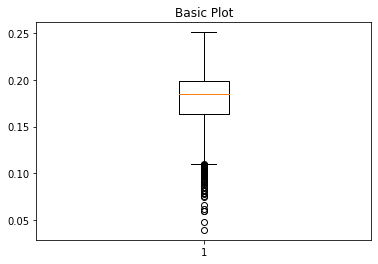

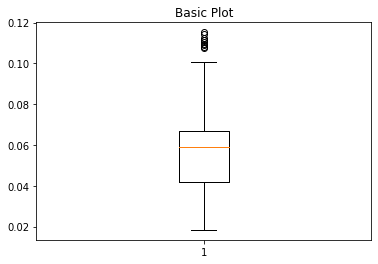

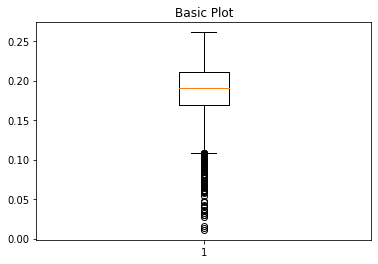

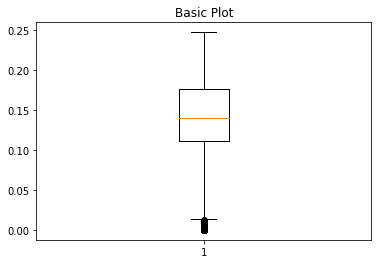

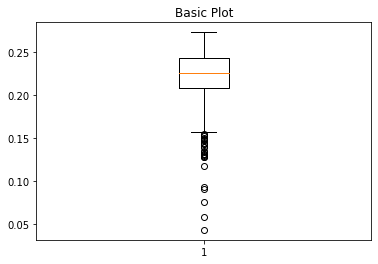

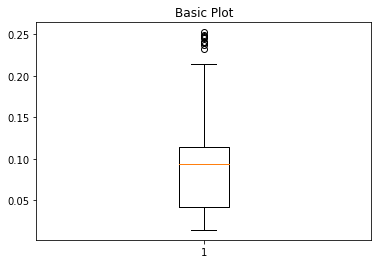

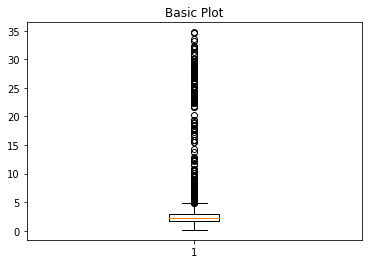

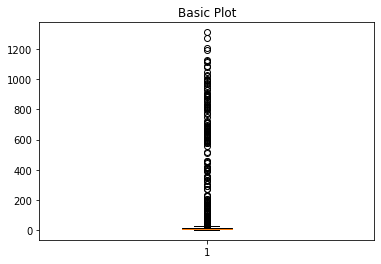

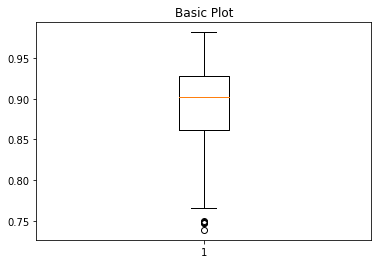

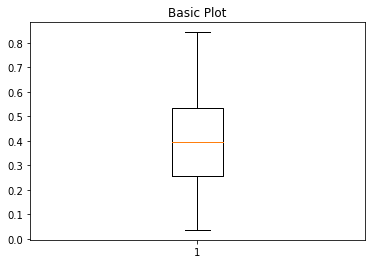

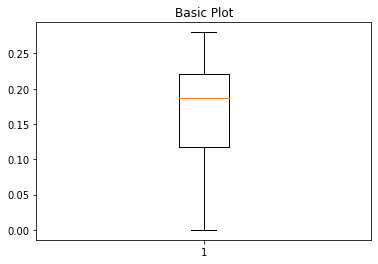

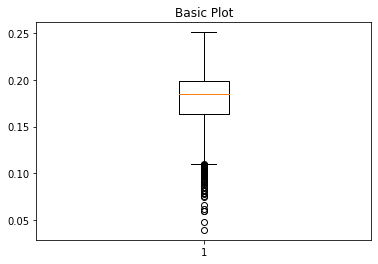

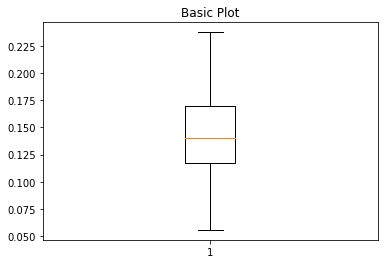

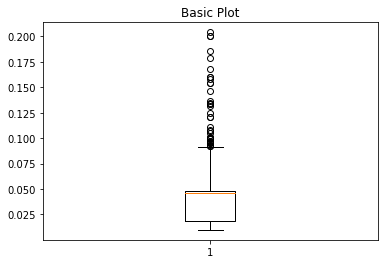

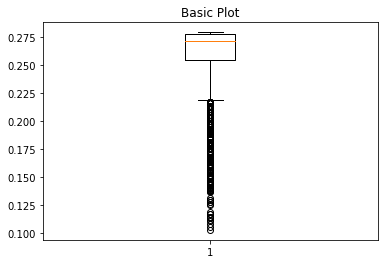

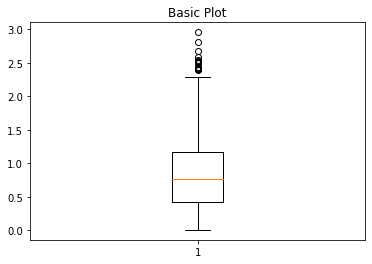

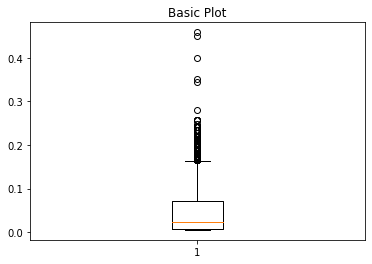

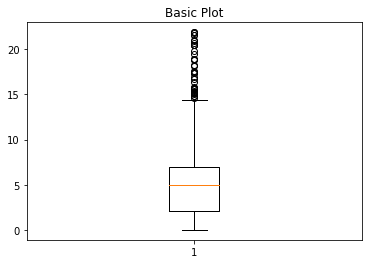

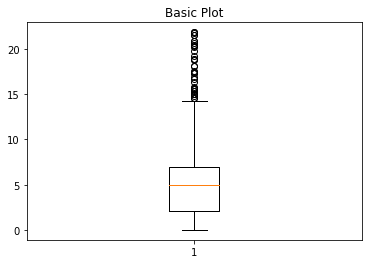

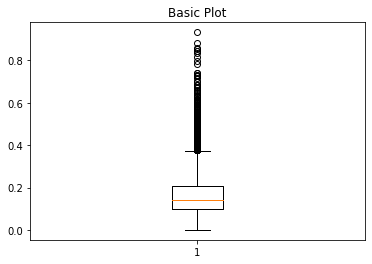

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,20):

  fig1, ax1 = plt.subplots()
  ax1.set_title('Basic Plot')
  #ax1.update_layout(width=750, height=300)
  ax1.boxplot(data[:,i])


In [ ]:
#labels are separated from variables

Xtrain = data_train_sorted[:,0:20]
Xtest = data_test[:,0:20]
Xctrain = data_train_sorted[:,20]
Xctest = data_test[:,20]

In [ ]:
T, P = PCA(Xtrain.astype(float),4)

In [ ]:
T_Female=T[0:977,:]
T_Male=T[977:,:]

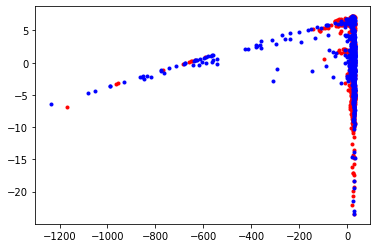

In [ ]:
plt.scatter(T_Female[:,0],T_Female[:,1], c = 'r', marker = '.')
plt.scatter(T_Male[:,0],T_Male[:,1], c = 'b',marker = '.')

plt.ion()
plt.show()

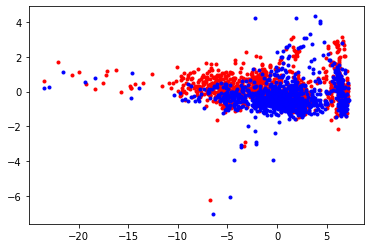

In [ ]:
plt.scatter(T_Female[:,1],T_Female[:,2], c = 'r', marker = '.')
plt.scatter(T_Male[:,1],T_Male[:,2], c = 'b',marker = '.')

plt.ion()
plt.show()

In [ ]:
Xctest

array([False, True, True, ..., True, False, False], dtype=object)

In [ ]:
#Cross validation sets

train_kcross1 = data_train[500:,:]
train_kcross2 = np.concatenate([data_train[:500,:], data_train[1000:,:]])
train_kcross3 = np.concatenate([data_train[:1000,:], data_train[1500:,:]])
train_kcross4 = data_train[:1500,:]
Train_Data = [train_kcross1[:,0:20],train_kcross2[:,0:20],train_kcross3[:,0:20],train_kcross4[:,0:20]]
Train_Labels = [train_kcross1[:,20],train_kcross2[:,20],train_kcross3[:,20],train_kcross4[:,20]]

test_kcross1 = data_train[:500,:]
test_kcross2 = data_train[500:1000,:]
test_kcross3 = data_train[1000:1500,:]
test_kcross4 = data_train[1500:2000,:]
Test_Data = [test_kcross1[:,0:20],test_kcross2[:,0:20],test_kcross3[:,0:20],test_kcross4[:,0:20]]
Test_Labels = [test_kcross1[:,20],test_kcross2[:,20],test_kcross3[:,20],test_kcross4[:,20]]

In [ ]:
k_iterations = (11,21,31,41)
accuracy =  np.ones((4,len(k_iterations)))
for a in range(4):
  Test_data = Test_Data[a]
  Test_labels = Test_Labels[a]
  Train_data = Train_Data[a]
  Train_labels = Train_Labels[a]
  count = 0

  for j in (k_iterations):
    k = j
    dist = np.zeros(len(Test_labels))
    errors = np.zeros(len(Test_labels))

    for i in range(len(Test_labels)):
      dist = np.sum((Train_data - Test_data[i,:])**2,axis = 1)**0.5
      sortIndex = np.argsort(dist)
      bestLabels = Train_labels[sortIndex[0:k]]
      prediction = (sum(bestLabels) > k/2.0)*1.0
      errors[i] = (Train_labels[i] != prediction)*1.0
    
    accuracy[a,count] = ((len(Test_labels)-np.sum(errors))/len(Test_labels))
    count = count+1

print(accuracy)







[[0.498 0.498 0.476 0.504]
 [0.538 0.538 0.53  0.52 ]
 [0.48  0.498 0.492 0.486]
 [0.508 0.5   0.504 0.506]]


In [ ]:
Average_acc = np.mean(accuracy, axis=0)
print(Average_acc)
Best = np.argmax(Average_acc)


[0.506  0.5085 0.5005 0.504 ]


In [ ]:
#k nearest neighbours algorithm
knn_TRAIN_ON = time.perf_counter()
k = k_iterations[Best]
dist = np.zeros(1168)
errors = np.zeros(1168)
Knn_score = np.zeros(1168)
predicted_values = np.zeros(1168)
for i in range(1168):
    count=0
    dist = np.sum((Xtrain - Xtest[i,:])**2,axis = 1)**0.5
    sortIndex = np.argsort(dist)
    bestLabels = Xctrain[sortIndex[0:k]]
    prediction = (sum(bestLabels) > k/2.0)*1.0
    predicted_values[i] = prediction
    errors[i] = (Xctest[i] != prediction)*1.0
    for j in range(len(bestLabels)):
      if bestLabels[j] == True:
        count = count + 1
    Knn_score[i] = count/k
print("total errors = ", np.sum(errors))

acc = ((1168-np.sum(errors))/1168)
print("Accuracy=", acc)

print("done")


knn_TRAIN_OFF = time.perf_counter()
print(f"Training/Testing time for KNN {knn_TRAIN_OFF-knn_TRAIN_ON:0.4f} seconds")

total errors =  356.0
Accuracy= 0.6952054794520548
done
Training/Testing time for KNN 7.9428 seconds


In [ ]:
#confusion Matrix for KNN
TP = 0
TN = 0
FP = 0
FN = 0
for i  in range(len(Xctest)):
    if predicted_values[i] == 1:
        if predicted_values[i] == Xctest[i]:
            TP = TP + 1
        else:
            FP = FP + 1
    elif predicted_values[i] == 0:
        if predicted_values[i] == Xctest[i]:
            TN = TN + 1
        else:
            FN = FN + 1

print("confusion matrix: KNN")  
print("TP",TP)
print("TN",TN)
print("FP",FP)
print("FN",FN)
print("\n")   


confusion matrix: KNN
TP 407
TN 405
FP 202
FN 154




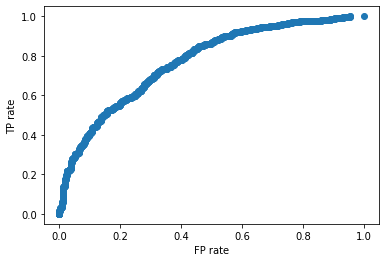

In [ ]:
#ROC algoritm for KNN
arg_sort_scores = np.argsort(Knn_score)[::-1]
sort_scores = np.sort(Knn_score)[::-1]
predicted_class_sorted = predicted_values[arg_sort_scores]
class_test_sorted = Xctest[arg_sort_scores]

N=FP+TN 
P=TP+FN

T=0
F=0

FP_R = np.zeros(len(predicted_class_sorted))
TP_R = np.zeros(len(predicted_class_sorted))
F_prev =0
count = 0
for i  in range(len(predicted_class_sorted)):
  if sort_scores[i] != F_prev:
    FP_R[i]=(F/N)
    TP_R[i]=(T/P)
    count=count+1
  if class_test_sorted[i] == True:
    T = T + 1
  else:
    F=F+1
FP_R[i]=(F/N)
TP_R[i]=(T/P)

plt.figure("ROC_Test")
plt.xlabel("FP rate")
plt.ylabel("TP rate")

plt.scatter(FP_R,TP_R)  




In [ ]:
#Import knearest neighbors Classifier model to compare with our algorithm
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=k_iterations[Best])

#Train the model using the training sets
knn.fit(Xtrain, Xctrain.astype(int))

#Predict the response for test dataset
y_pred = knn.predict(Xtest)
print('sklearn knn number of errors is:') 
print(np.sum(y_pred != Xctest))

sklearn knn number of errors is:
356


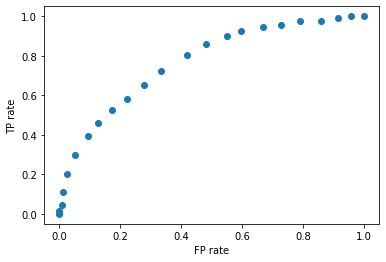

In [ ]:
#compare Sklearn ROC implementation with our algorithim
# convert true and false lables to 1 and 0 
test_label =np.ones(len(Xctest))
true=0
false=0
for i in range(len(Xctest)):
  Xctest[i]
  if Xctest[i] == True:
    true = true+1
    test_label[i] = 1
  if Xctest[i] == False:
    false=false+1
    test_label[i] = 0

# Predict probablities of test data [0,1]
scores = list(knn.predict_proba(Xtest)[:,1])
sort = np.argsort(scores)[::-1]
scores_sorted = np.sort(scores)[::-1]
Xtest_sorted = Xtest[sort,:]

from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
roc = dict()
fpr, tpr, _ = roc_curve(test_label, scores)
plt.figure("ROC")
plt.xlabel("FP rate")
plt.ylabel("TP rate")
plt.scatter(fpr,tpr)

In [ ]:
#training the naive bayes model
#splitting the training set to Femal and Male
NB_TRAIN_ON = time.perf_counter()

Xtrain_F = Xtrain[:977,:]
Xtrain_M = Xtrain[977:,:]
Xctrain_F = Xctrain[:977]
Xctrain_M = Xctrain[977:]

#evaluate the means and standard deviations

Xtrain_F_mean = Xtrain_F.mean(axis=0)
Xtrain_M_mean = Xtrain_M.mean(axis=0)
Xtrain_F_var = np.var(Xtrain_F[:], axis=0)
Xtrain_M_var = np.var(Xtrain_M[:], axis=0)


Xtrain_F_std = np.ones_like(Xtrain_F_var)
for i in range(20):
  Xtrain_F_std[i] = np.sqrt(Xtrain_F_var[i])

Xtrain_M_std = np.ones_like(Xtrain_M_var)
for i in range(20):
  Xtrain_M_std[i] = np.sqrt(Xtrain_M_var[i])

NB_TRAIN_OFF = time.perf_counter()
print(f"Training time for NB {NB_TRAIN_OFF-NB_TRAIN_ON:0.4f} seconds")

Training time for NB 0.0125 seconds


In [ ]:
#define probaibility density function that returns probability density given the value, mean and std

def prob_density_norm(v, mean, std):
  c = 1/(np.sqrt(2*np.pi)*std)
  prob_density = c*np.exp(-((v-mean)**2)/(2*std**2))
  return prob_density

In [ ]:
#running the naive bayes model
NB_TEST_ON = time.perf_counter()

prediction_bay=np.ones_like(Xctest)
Score_Male =np.ones(len(Xctest))
for j in range(1168):
  p_female = 977/2000
  p_male = 1023/2000
  for i in range(20):
    p_female = p_female*prob_density_norm(Xtest[j,i],Xtrain_F_mean[i],Xtrain_F_std[i])
    p_male = p_male*prob_density_norm(Xtest[j,i],Xtrain_M_mean[i],Xtrain_M_std[i])
    
  Score_Male[j] =  p_male
  prediction_bay[j] = p_female<p_male

#evaluate the naive bayes model best on testing dataset 
np.sum(prediction_bay!=Xctest)

NB_TEST_OFF = time.perf_counter()
print(f"Testing time for NB {NB_TEST_OFF-NB_TEST_ON:0.4f} seconds")

Testing time for NB 0.3288 seconds


In [ ]:
#confusion matrix naive bayes

TP = 0
TN = 0
FP = 0
FN = 0
for i  in range(len(Xctest)):
    if prediction_bay[i] == 1:
        if prediction_bay[i] == Xctest[i]:
            TP = TP + 1
        else:
            FP = FP + 1
    elif prediction_bay[i] == 0:
        if prediction_bay[i] == Xctest[i]:
            TN = TN + 1
        else:
            FN = FN + 1

print("confusion matrix: naive bayes")    
print("TP",TP)
print("TN",TN)
print("FP",FP)
print("FN",FN)
print("\n")   



confusion matrix: naive bayes
TP 495
TN 535
FP 72
FN 66




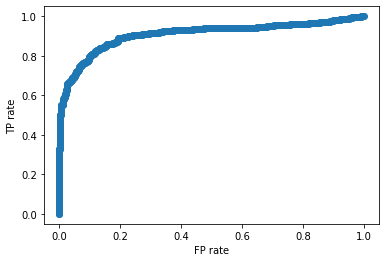

In [ ]:
#ROC algoritm for Naive Bayes 
arg_sort_scores = np.argsort(Score_Male)[::-1]
sort_scores = np.sort(Score_Male)[::-1]
predicted_class_sorted = prediction_bay[arg_sort_scores]
class_test_sorted = Xctest[arg_sort_scores]

N=FP+TN
P=TP+FN

T=0
F=0

FP_R = np.ones(len(predicted_class_sorted))
TP_R = np.ones(len(predicted_class_sorted))
F_prev =0
for i  in range(len(predicted_class_sorted)):
  if sort_scores[i] != F_prev:
    FP_R[i]=(F/N)
    TP_R[i]=(T/P)
  if class_test_sorted[i] == True:
    T = T + 1
  else:
    F=F+1
FP_R[i]=(F/N)
TP_R[i]=(T/P)

plt.figure("ROC_Test")
plt.xlabel("FP rate")
plt.ylabel("TP rate")

plt.scatter(FP_R,TP_R)  

142
Accuracy= 0.8784246575342466


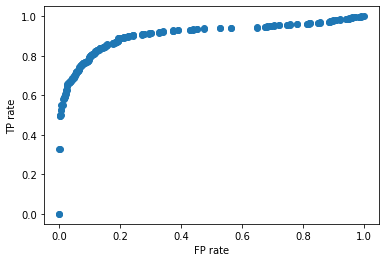

In [ ]:
#Import Naive Bayes model to compare with our algorithm
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
#NB.fit(Xtrain, train_label)
NB.fit(Xtrain,  Xctrain.astype(int))

predictions = list(NB.predict(Xtest))
print(np.sum(predictions!=Xctest))
print("Accuracy=", (len(predictions)-np.sum(predictions!=Xctest))/len(predictions))


#compare Skleran ROC to our algorithim
# Predict probablities of test data [0,1]
scores = list(NB.predict_proba(Xtest)[:,1])
sort = np.argsort(scores)[::-1]
scores_sorted = np.sort(scores)[::-1]
Xtest_sorted = Xtest[sort,:]


from sklearn.metrics import roc_curve
fpr_1 = dict()
tpr_1 = dict()
roc_1 = dict()
fpr_1, tpr_1, _ = roc_curve(test_label, Score_Male)
plt.figure("ROC")
plt.xlabel("FP rate")
plt.ylabel("TP rate")

plt.scatter(fpr_1,tpr_1)  




Training time for AB 0.1135 seconds
Testing time for AB 0.0104 seconds
sklearn AdaBoost number of errors is:
44


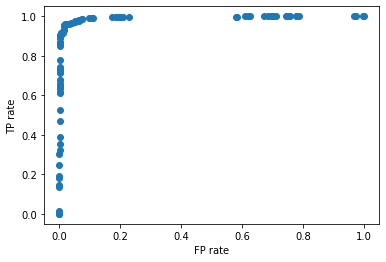

In [ ]:
#SKlearn Adaboost implementation
from sklearn.ensemble import AdaBoostClassifier

clf =  AdaBoostClassifier(n_estimators=10)


clf.fit(Xtrain, Xctrain.astype(int))


y_pred = clf.predict(Xtest)

print('sklearn AdaBoost number of errors is:') 
print(np.sum(y_pred != Xctest))


# Predict probablities of test data [0,1]
scores = list(clf.predict_proba(Xtest)[:,1])
sort = np.argsort(scores)[::-1]
scores_sorted = np.sort(scores)[::-1]
Xtest_sorted = Xtest[sort,:]


from sklearn.metrics import roc_curve
fpr = dict()
tpr = dict()
roc = dict()
fpr, tpr, _ = roc_curve(test_label, scores)
plt.figure("ROC")
plt.xlabel("FP rate")
plt.ylabel("TP rate")

plt.scatter(fpr,tpr)  

In [ ]:

# Decision stump used as weak classifier
class DecisionStump():
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
            
        return predictions


class Adaboost():

    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))

        self.clfs = []
        # Iterate through classifiers
        for _ in range(self.n_clf):
            clf = DecisionStump()

            min_error = float('inf')
            # greedy search to find best threshold and feature
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)

                for threshold in thresholds:
                    # predict with polarity 1
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    # Error = sum of weights of misclassified samples
                    misclassified = w[y != predictions]
                    error = sum(misclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    # store the best configuration
                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
                        min_error = error

            # calculate alpha
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

            # calculate predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred


from sklearn import datasets
from sklearn.model_selection import train_test_split


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


Xctrain[Xctrain == 0] = -1
Xctest[Xctest == 0] = -1

# Adaboost classification with 5 weak classifiers

AB_TRAIN_ON = time.perf_counter()

clf = Adaboost(n_clf=10)
clf.fit(Xtrain.astype(float), Xctrain.astype(float))

AB_TRAIN_OFF = time.perf_counter()
print(f"Training time for AB {AB_TRAIN_OFF-AB_TRAIN_ON:0.4f} seconds")

AB_TEST_ON = time.perf_counter()

y_pred_ada = clf.predict(Xtest.astype(float))


AB_TEST_OFF = time.perf_counter()
print(f"Testing time for AB {AB_TEST_OFF-AB_TEST_ON:0.4f} seconds")

#change Xctest

acc = accuracy(Xctest.astype(float), y_pred_ada)
print ("Accuracy:", acc)

Training time for AB 97.0963 seconds
Testing time for AB 0.0022 seconds
Accuracy: 0.9674657534246576


In [ ]:
#confusion matrix AdaBoost

TP = 0
TN = 0
FP = 0
FN = 0
for i  in range(len(Xctest)):
    if y_pred_ada[i] == 1:
        if y_pred_ada[i] == Xctest[i]:
            TP = TP + 1
        else:
            FP = FP + 1
    elif y_pred_ada[i] == -1:
        if y_pred_ada[i] == Xctest[i]:
            TN = TN + 1
        else:
            FN = FN + 1

print("confusion matrix: AdaBoost")    
print("TP",TP)
print("TN",TN)
print("FP",FP)
print("FN",FN)
print("\n")   


confusion matrix: AdaBoost
TP 542
TN 588
FP 19
FN 19




In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Algorithm', 'Training Time', 'Testing Time']),
                 cells=dict(values=[['K Nearest Neighbour', 'Naive Bayes', 'Adaboost'],[(round((knn_TRAIN_OFF-knn_TRAIN_ON),3)), round((NB_TRAIN_OFF-NB_TRAIN_ON),3), round((AB_TRAIN_OFF - AB_TRAIN_ON),3)], ['NA', round((NB_TEST_OFF-NB_TEST_ON),3), round((AB_TEST_OFF - AB_TEST_ON),3)]]))
                     ])
fig.update_layout(width=750, height=300)
fig.show()